<a href="https://colab.research.google.com/github/Yadanar025/MMDT_2025_MLAI101/blob/Khin-Yadanar-Aung/KhinYadanarAung/HW7_LogisticRegression/lab2_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/Yadanar025/Supervised-Machine-Learning/refs/heads/main/data/fraud.csv', index_col = 0)
y = df['Class'].values
df = df.iloc[:,1:]
X = df.drop(columns = 'Class').values

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                    test_size = 0.40,
                                    random_state=1)

In [ ]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(13015, 29) (8678, 29)
(13015,) (8678,)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#--------------------------------------------------
## ------------Logistic Regresion----------------##
#--------------------------------------------------

from sklearn.linear_model import LogisticRegression

steps = [('scaler', StandardScaler()),
         ('logReg', LogisticRegression(penalty = "l2", C =0.1 ,solver='lbfgs',multi_class='multinomial'))]

LR_pipeline = Pipeline(steps)
LR_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('logReg',
                 LogisticRegression(C=0.1, multi_class='multinomial'))])

In [ ]:
#--------------------------------------------------
## Model Evaluation ##
#--------------------------------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


ypred_test = LR_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)

ypred_testP = LR_pipeline.predict_proba(X_test)
auc = roc_auc_score(y_test, ypred_testP[:,1])
print(auc)

[[8536    5]
 [  29  108]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8541
           1       0.96      0.79      0.86       137

    accuracy                           1.00      8678
   macro avg       0.98      0.89      0.93      8678
weighted avg       1.00      1.00      1.00      8678

0.9842032890728021


In [ ]:
ypred_train = LR_pipeline.predict(X_train)
mat_clf = confusion_matrix(y_train, ypred_train)
report_clf = classification_report(y_train, ypred_train)

print(mat_clf)
print(report_clf)

ypred_trainP = LR_pipeline.predict_proba(X_train)
auc = roc_auc_score(y_train, ypred_trainP[:,1])
print(auc)

[[12794     2]
 [   46   173]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12796
           1       0.99      0.79      0.88       219

    accuracy                           1.00     13015
   macro avg       0.99      0.89      0.94     13015
weighted avg       1.00      1.00      1.00     13015

0.9802396154049282


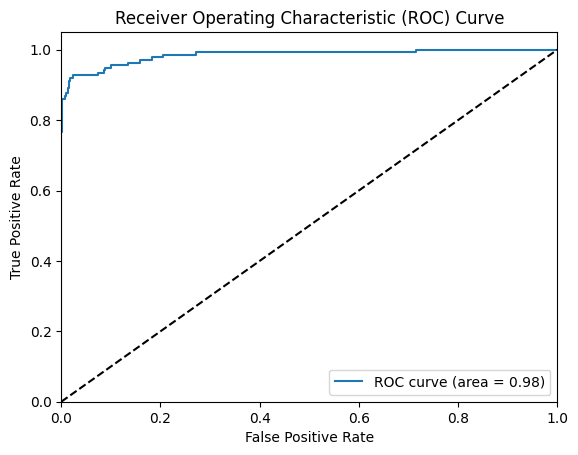

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, ypred_testP[:,1])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()